# 영화 스크린 수가 영화 흥행에 영향을 미칠까?

* 영화가 흥행에는 관객수가 큰 요인이 된다.
* 스크린(상영관)이 많은 것이 관객을 모으는 것에 큰 요인이 될까?
* 영화 스크린 수와 영화 관객과의 상관관계가 강한 양의 상관관계를 가지고 있을까?

In [1]:
import pandas as pd
import numpy as np

In [2]:
top_movie = pd.read_excel('./KOBIS_역대_박스오피스_내역(공식통계_기준)_2021-07-06.xlsx')

In [3]:
top_movie

,순위,영화명,개봉일,매출액,관객수,Unnamed: 5,스크린수,Unnamed: 7,대표국적,국적,배급사
0,1,명량,2014-07-30,1.357484e+11,NaN,17613682,NaN,1587,한국,한국,(주)씨제이이엔엠
1,2,극한직업,2019-01-23,1.396480e+11,NaN,16264944,NaN,1978,한국,한국,(주)씨제이이엔엠
2,3,신과함께-죄와 벌,2017-12-20,1.156987e+11,NaN,14410754,NaN,1912,한국,한국,롯데쇼핑㈜롯데엔터테인먼트
3,4,국제시장,2014-12-17,1.109135e+11,NaN,14257115,NaN,966,한국,한국,(주)씨제이이엔엠
4,5,어벤져스: 엔드게임,2019-04-24,1.221827e+11,NaN,13934592,NaN,2835,미국,미국,월트디즈니컴퍼니코리아 유한책임회사
...,...,...,...,...,...,...,...,...,...,...,...
495,496,분노의 질주: 더 얼티메이트,2021-05-19,1.726808e+10,NaN,1790155,NaN,2296,미국,미국,유니버설픽쳐스인터내셔널 코리아(유)
496,497,아내가 결혼했다,2008-10-23,1.199586e+10,NaN,1788748,NaN,414,한국,한국,CJ ENM
497,498,저스티스 리그,2017-11-15,1.462969e+10,NaN,1786386,NaN,1308,미국,미국,워너브러더스 코리아(주)
498,499,여고괴담 세번째 이야기: 여우계단,2003-08-01,0.000000e+00,NaN,1784479,S,44,한국,한국,(주)시네마서비스


In [4]:
del top_movie['관객수']
del top_movie['스크린수']
del top_movie['대표국적']
del top_movie['국적']
del top_movie['배급사']

top_movie.head()

,순위,영화명,개봉일,매출액,Unnamed: 5,Unnamed: 7
0,1,명량,2014-07-30,1.357484e+11,17613682,1587
1,2,극한직업,2019-01-23,1.396480e+11,16264944,1978
2,3,신과함께-죄와 벌,2017-12-20,1.156987e+11,14410754,1912
3,4,국제시장,2014-12-17,1.109135e+11,14257115,966
4,5,어벤져스: 엔드게임,2019-04-24,1.221827e+11,13934592,2835


In [5]:
top_movie.rename(columns = {top_movie.columns[4]:'관객수',
                top_movie.columns[5]: '스크린수'}, inplace = True)

In [6]:
top_movie

,순위,영화명,개봉일,매출액,관객수,스크린수
0,1,명량,2014-07-30,1.357484e+11,17613682,1587
1,2,극한직업,2019-01-23,1.396480e+11,16264944,1978
2,3,신과함께-죄와 벌,2017-12-20,1.156987e+11,14410754,1912
3,4,국제시장,2014-12-17,1.109135e+11,14257115,966
4,5,어벤져스: 엔드게임,2019-04-24,1.221827e+11,13934592,2835
...,...,...,...,...,...,...
495,496,분노의 질주: 더 얼티메이트,2021-05-19,1.726808e+10,1790155,2296
496,497,아내가 결혼했다,2008-10-23,1.199586e+10,1788748,414
497,498,저스티스 리그,2017-11-15,1.462969e+10,1786386,1308
498,499,여고괴담 세번째 이야기: 여우계단,2003-08-01,0.000000e+00,1784479,44


In [7]:
top_movie.dtypes

순위               int64
영화명             object
개봉일     datetime64[ns]
매출액            float64
관객수              int64
스크린수             int64
dtype: object

In [8]:
top_movie[top_movie['관객수'].isna()]

,순위,영화명,개봉일,매출액,관객수,스크린수


In [9]:
top_movie[top_movie['스크린수'].isna()]

,순위,영화명,개봉일,매출액,관객수,스크린수


In [10]:
top_movie.to_excel('역대영화순위.xlsx', index = False)

In [11]:
top_movie = pd.read_excel('역대영화순위.xlsx')

In [12]:
top_movie.head()

,순위,영화명,개봉일,매출액,관객수,스크린수
0,1,명량,2014-07-30,1.357484e+11,17613682,1587
1,2,극한직업,2019-01-23,1.396480e+11,16264944,1978
2,3,신과함께-죄와 벌,2017-12-20,1.156987e+11,14410754,1912
3,4,국제시장,2014-12-17,1.109135e+11,14257115,966
4,5,어벤져스: 엔드게임,2019-04-24,1.221827e+11,13934592,2835


In [13]:
np.corrcoef(top_movie['스크린수'],top_movie['관객수'])

#약한 양의 상관관계

array([[1.        , 0.37941468],
       [0.37941468, 1.        ]])

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
fp1 = np.polyfit(top_movie['스크린수'],top_movie['관객수'], 1) # 기울기와 y절편과 차수
fp1

array([1.83865540e+03, 2.67558074e+06])

In [16]:
f1 = np.poly1d(fp1) # polynominal class로 만들어주기, first class로 표현, 위의 결과 [1.83865540e+03, 2.67558074e+06]집어넣음
f1

poly1d([1.83865540e+03, 2.67558074e+06])

In [17]:
fx = np.linspace(np.min(top_movie['스크린수']), np.max(top_movie['스크린수']), 100)
fx

array([   0.        ,   28.63636364,   57.27272727,   85.90909091,
        114.54545455,  143.18181818,  171.81818182,  200.45454545,
        229.09090909,  257.72727273,  286.36363636,  315.        ,
        343.63636364,  372.27272727,  400.90909091,  429.54545455,
        458.18181818,  486.81818182,  515.45454545,  544.09090909,
        572.72727273,  601.36363636,  630.        ,  658.63636364,
        687.27272727,  715.90909091,  744.54545455,  773.18181818,
        801.81818182,  830.45454545,  859.09090909,  887.72727273,
        916.36363636,  945.        ,  973.63636364, 1002.27272727,
       1030.90909091, 1059.54545455, 1088.18181818, 1116.81818182,
       1145.45454545, 1174.09090909, 1202.72727273, 1231.36363636,
       1260.        , 1288.63636364, 1317.27272727, 1345.90909091,
       1374.54545455, 1403.18181818, 1431.81818182, 1460.45454545,
       1489.09090909, 1517.72727273, 1546.36363636, 1575.        ,
       1603.63636364, 1632.27272727, 1660.90909091, 1689.54545

In [18]:
f1(fx)

array([2675580.73870931, 2728233.1432077 , 2780885.5477061 ,
       2833537.95220449, 2886190.35670288, 2938842.76120128,
       2991495.16569967, 3044147.57019806, 3096799.97469646,
       3149452.37919485, 3202104.78369324, 3254757.18819164,
       3307409.59269003, 3360061.99718842, 3412714.40168681,
       3465366.80618521, 3518019.2106836 , 3570671.61518199,
       3623324.01968039, 3675976.42417878, 3728628.82867717,
       3781281.23317557, 3833933.63767396, 3886586.04217235,
       3939238.44667075, 3991890.85116914, 4044543.25566753,
       4097195.66016593, 4149848.06466432, 4202500.46916271,
       4255152.87366111, 4307805.2781595 , 4360457.68265789,
       4413110.08715629, 4465762.49165468, 4518414.89615307,
       4571067.30065146, 4623719.70514986, 4676372.10964825,
       4729024.51414664, 4781676.91864504, 4834329.32314343,
       4886981.72764182, 4939634.13214022, 4992286.53663861,
       5044938.941137  , 5097591.3456354 , 5150243.75013379,
       5202896.15463218,

In [19]:
import platform

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

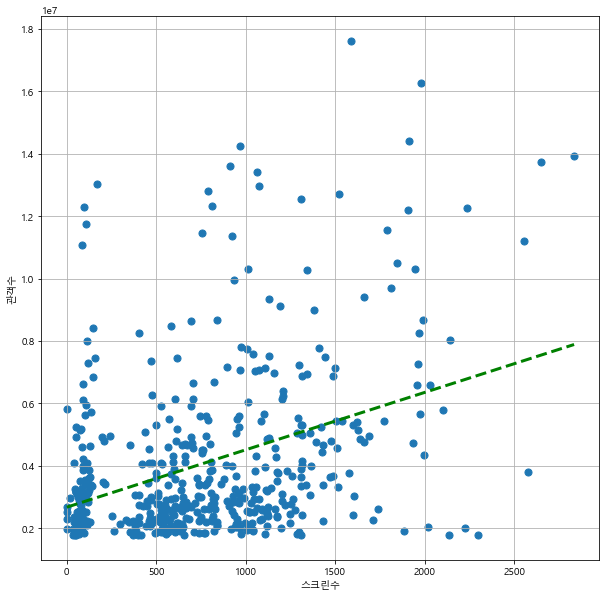

In [20]:
#시각화

plt.figure(figsize=(10,10))
plt.scatter(top_movie['스크린수'],top_movie['관객수'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
plt.xlabel('스크린수')
plt.ylabel('관객수')
plt.grid()
plt.show()

# 상관관계 거의 없다!?

* 상관계수를 알아보는 함수에서 보다시피, 0.37941468의 약한 양의 상관관계를 가지고 있음.
* 시각화하여 확인한 결과, 스크린수가 많다고 해서 해당 영화를 많이 보는 것은 아니라는 것을 알 수 있음.